使用するモジュールのimport

In [1]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass
import pandas as pd

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

In [6]:
# アヤメデータをPandasに読み込む
Iris = pd.read_csv('./Iris.csv')
Iris = Iris.iloc[:, 1:5]
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# 関係の度合い

## 散布図と相関係数

ここまでは１種類の量的データの要約法を扱ってきたが，一方で２種類の量的データの間の関係について知りたい場合もある．
ここでは，2種類の量的データを変数$ X $と$ Y $で表し，これらの間の関係を可視化・定量化する方法を扱う．

まず，２つの量的データの間の関係を可視化するには，それぞれを横軸と縦軸に取ったグラフを描けば一目瞭然である．
このようなグラフは**散布図**と呼ばれる．
より具体的に散布図とは，$ n $組のデータ$ (x_{1}, y_{1}),\ (x_{2}, y_{2}), \ldots, (x_{n}, y_{n}) $に対し，$ (x_{i}, y_{i}) $を座標とする点を$ X-Y $平面上にとったグラフのことである．
なお，データは必ず点でプロットし，データ同士を線で結んだりはしない．

例として，アヤメデータについて，がく片の長さと幅，花弁の長さと幅の散布図を描いてみる

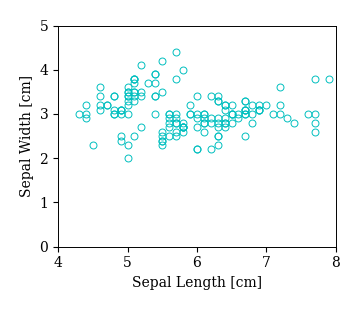

In [7]:
# 散布図
fig, ax = plt.subplots()
ax.plot(Iris['Sepal Length'], Iris['Sepal Width'], 'co', mfc='None')
ax.set_xlim(4, 8); ax.set_ylim(0, 5)
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]');
# fig.savefig('figure/sepal_l-w.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

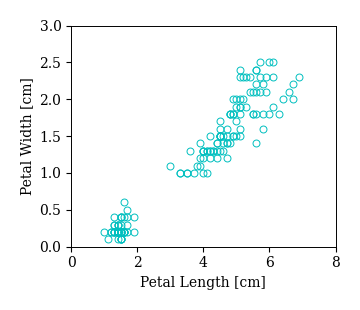

In [10]:
# 散布図
fig, ax = plt.subplots()
ax.plot(Iris['Petal Length'], Iris['Petal Width'], 'co', mfc='None')
ax.set_xlim(0, 8); ax.set_ylim(0, 3)
ax.set_xlabel('Petal Length [cm]')
ax.set_ylabel('Petal Width [cm]');
# fig.savefig('figure/sepal_l-w.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

まず，がく片の散布図を見ると，長さに対して幅が一定となっており，特に２つの変数に関係はないようである．
一方，花弁については右上と左下の区画にデータ点が多く，右上がりの傾向がある．
すなわち，花弁が長くなれば，それとともに花弁の幅も大きくなる傾向がある．

なお，もし散布図の中に他の点から極端に外れた点がある場合は外れ値の可能性が高い．
このような場合には加工に誤りがないか調べ，データ解析からその値を削除するかどうか検討する．

変数$ X,\ Y $の散布図に右上がりの傾向などがある場合には相関関係があるという．
このような相関関係を定量化した量は**ピアソンの相関係数**と呼ばれ，以下の式で定義される：

$$
	r_{XY} = \frac{\displaystyle\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}\sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}} = \frac{s_{XY}}{s_{X}s_{Y}}
$$(eq:correlation)

また，分散公式を用いると，以下のように表すこともできる：

$$
	r_{XY} = \frac{\overline{xy} - \bar{x}\bar{y}}{(\overline{x^{2}} - \bar{x}^{2})(\overline{y^{2}} - \bar{y}^{2})}
$$(eq:correlation2)

ここで，式{eq}`eq:correlation`の分子に現れた量

$$
	s_{XY} = \frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y}) = \overline{xy} - \bar{x}\bar{y}
$$(eq:covariance)

は変数$ X,\ Y $の**共分散**と呼ばれる（$ \mathrm{Cov}(X, Y) $と表すこともある）．
共分散は各データごとに$ X,\ Y $の偏差（平均との差）の積を考え，それらの全データに対する平均を考えている．
これにより，散布図が右上がりのときに正，右下がりのときには負となる統計量が得られる．
ただし，これだけだと$ X,\ Y $の単位やばらつきの度合いによって値が大きく異なってしまい，相関の程度を一定の基準で表すことができない．
そこで，共分散を$ X,\ Y $の標準偏差で割って，各変数の単位やばらつきの度合いに依らない量としたのが相関係数である．

実際，相関係数の定義域は$ -1\leq r_{XY} \leq 1 $であり，その絶対値によって相関の強さを表すことができる．
また，定義より，相関係数の符号は右上がりの傾向の場合に正，右下がりの傾向の場合に負となる．
特に，相関係数が正の値のときに**正の相関**，負の値のときに**負の相関**があるという．
また，相関係数が0のときには**無相関**という．

実際にアヤメデータから相関係数を求めてみる．

In [ ]:
# 相関係数
Iris.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.00,-0.11,0.87,0.82
Sepal_Width,-0.11,1.00,-0.42,-0.36
Petal_Length,0.87,-0.42,1.00,0.96
Petal_Width,0.82,-0.36,0.96,1.00


がく片については$ r_{XY} = -0.11 $なのでほぼ無相関，花弁については$ r_{XY}=0.96 $となるので強い正の相関があることが分かる．

なお，相関係数はあくまでも２つの変数の散布図が直線的な関係になる場合だけ意味があることに注意しなければならない．
例えば，$ X,\ Y $の散布図が円状に分布する場合，２つの変数には何かしらの規則があると考えられるが，相関係数は0となり無相関と判断されてしまう．
このため，相関係数を調べる際には必ず散布図も併せて描く必要がある．

## 相関関係と因果関係

2つの変数$ X,\ Y $の間に相関関係があったときに，それらの間に因果関係があるといえるだろうか？
つまり，$ X\Rightarrow Y $または$ Y \Rightarrow X $という関係が成り立つだろうか？
実は，これは必ずしも成り立つとは限らない．
その理由は，第一に，全くの偶然で強い相関関係が現れることがあるからである．
例えば，文献{cite}`中室2017`によると，以下の３つは全くの偶然で強い相関関係が現れた例である：
- 「ニコラス・ケイジの年間映画出演本数」と「プールの溺死者数」
- 「ミス・アメリカの年齢」と「暖房器具による死亡者数」
- 「商店街における総収入」と「アメリカでのコンピュータサイエンス博士号取得者数」 


また，第二に，調べたい2つの変数$ X,\ Y $それぞれが別の変数$ Z $と強く相関する場合，$ X $と$ Y $の相関が見かけ上強くなってしまうこともある．
このような相関は\textbf{疑似相関}と呼ばれ，疑似相関の原因となる変数$ Z $のことを**第3の変数**と呼ぶ．
疑似相関では，$ Z \Rightarrow X $および$ Z \Rightarrow Y $という因果関係が成り立つが，$ X\Rightarrow Y $または$ Y \Rightarrow X $という因果関係は成り立たないことに注意する．
なお，第3の変数のデータは必ずしも手に入るとは限らないが，もし入手できていない場合は**潜在変数**と呼ぶ．
疑似相関の例は枚挙にいとまがないが，例えば，「子供の体力」と「子供の学力」の強い相関関係は疑似相関の典型例である．
この場合，第3の変数は「親の教育熱心さ」であり，親が教育熱心であれば当然学力が高い傾向にあり，また子供にスポーツを習わせるので体力も上がる傾向があるということになる．

第3の変数の影響を除く方法はいくつか知られている．
1つ目は第3の変数による層別の方法である．
これは，第3の変数の値が近いものだけでいくつかのグループに分け，グループ内で相関を見る方法である．

2つ目は第3の変数の単位あたりの量に変換する方法である．
例えば，第3の変数が人口の場合，人口1人あたりの$ X,\ Y $に変換し，これらの相関を見ることで正しい相関関係を調べることができる．

3つ目は**偏相関係数**を用いる方法である．
偏相関係数とは，関係を調べたい2つの変数に対して別の変数の影響を取り除いた上で求めた相関係数である．
いま，第3の変数を$ Z $とし，$ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $に対して$ (z_{1}, \ldots, z_{n}) $の影響を除いた相関係数を考えたい．
これには，以下のように回帰直線の考え方を使う．
まず，$ Z $による$ X $の予測値を$ \hat{x}_{i} = a z_{i} + b $として，最小二乗法によって$ a,\ b $を求める．
このとき，$ Z $の影響を除いた$ X $を$ \tilde{X} $とすると，これは残差$ \tilde{x}_{i} = x_{i} - \hat{x}_{i} $によって与えられる．
同様にして，$ Z $の影響を除いた$ Y $を$ \tilde{Y} $とすると，これは予測値$ \hat{y}_{i} = c z_{i} + d $に対して，残差$ \tilde{y}_{i} = y_{i} - \hat{y}_{i} $によって与えられる．
%
このようにして，$ Z $の影響を除いた$ \tilde{X}, \tilde{Y} $のデータ$ (\tilde{x}_{i}, \tilde{y}_{i})=(x_{i}-\hat{x}_{i}, y_{i}-\hat{y}_{i})\ (i=1,2,\ldots, n) $が得られる．
%
偏相関係数は$ Z $の影響を除いた$ \tilde{X}, \tilde{Y} $の相関係数$ r_{\tilde{X}, \tilde{Y}} $として定義されるが，実は$ r_{\tilde{X}, \tilde{Y}} $は以下のように変数$ X,Y,Z $に対する通常の相関係数から求めることができる：

$$
	r_{\tilde{X}, \tilde{Y}} = \frac{r_{XY} - r_{XZ} r_{YZ}}{\sqrt{(1-r_{XZ}^{2})(1-r_{YZ}^{2})}}
$$(eq:tpartial_correlation)

証明には次節で扱う最小二乗法が必要となるので省略する（[ここ](https://manabitimes.jp/math/1400)を参照）．

なお，第３の変数を取り除いた結果相関がなくなれば，それは擬似相関であり，2変数間に因果関係がないことが分かる．
一方，第３の変数を取り除いても相関が大きいままの場合，相関関係が成立する可能性は高くなるが，２変数間に因果関係があるかについては何も言えないことに注意する．
例えば，偏相関係数が大きくてもそれが因果関係の存在を意味するわけではない．
また，第３の変数の影響によって見かけ上相関が発生する疑似相関とは逆に，第３の変数の影響によって見かけ上無相関となる**疑似無相関**も存在する．

## 実例：警察職員数と刑法犯認知件数の関係

### STEP1: Problem
- ある統計によると，警察官の数と犯罪の件数には正の相関関係があると言われている．
- では，これらの間に因果関係はあるだろうか？

### STEP2, 3: Plan, Data

- 都道府県別の警察職員数と刑法犯認知件数のデータを用い，これらの相関関係および因果関係の有無を調べることにする．
- 今回用いるデータは以下の通りである：
    - 都道府県別の刑法犯認知件数
        - [H27年，都道府県別刑法犯の認知件数，検挙件数，検挙人員](https://www.npa.go.jp/hakusyo/h27/data.html)
    - 都道府県別の警察職員数
        - [H27年，地方公共団体定員管理関係](https://www.soumu.go.jp/main_sosiki/jichi_gyousei/c-gyousei/teiin/109981data.html)
     - 都道府県別の人口
         - [住民基本台帳に基づく人口，人口動態及び世帯数調査](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200241&tstat=000001039591&cycle=7&year=20150&month=0&tclass1=000001039601&result_back=1&tclass2val=0)

In [13]:
# データの読み込み
Crime = pd.read_csv('material/sec_2-3/number_crime.csv', index_col='p')

- 下図は2015年度の都道府県別警察職員数と刑法犯認知件数の散布図を表している．
- この散布図を見ると確かに両者には正の相関関係があり，相関係数も高くなりそうである．
- では，このことから警察職員数と刑法犯認知件数に因果関係があるといえるだろうか？
- これを調べるため，今回は都道府県の人口を第3の変数と仮定して解析を行う．

Text(0, 0.5, '刑法犯認知件数（万件）')

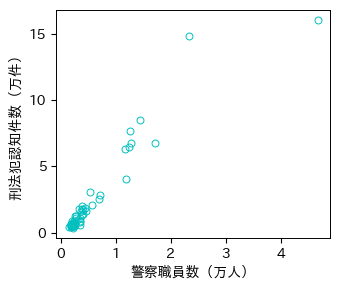

In [14]:
fig, ax = plt.subplots()
ax.plot(Crime['警察職員数']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数（万人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/police_crime.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

#### 実習：相関係数
- 上図について，相関係数を求めよ．

In [7]:
# 相関係数
Crime.corr()['刑法犯認知件数']['警察職員数']

0.9424697256476458

### STEP4: Analysis

- まず，都道府県の人口を第3の変数と仮定し，警察職員数と刑法犯認知件数の関係が疑似相関であるか調べる．

#### 実習：人口との散布図
- 刑法犯認知件数と警察職員数のそれぞれについて人口との散布図を描け．
- これらの散布図の相関係数を求め，それが何を意味するか考察せよ．

Text(0, 0.5, '刑法犯認知件数（万件）')

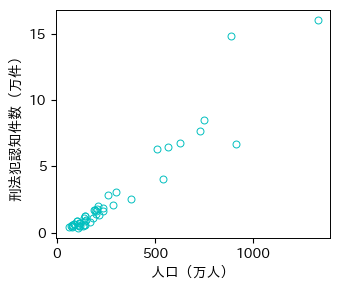

In [15]:
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('人口（万人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/pop_crime.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [16]:
# 相関係数
Crime.corr()['人口']['刑法犯認知件数']

0.9576469769539204

Text(0, 0.5, '警察職員数（万人）')

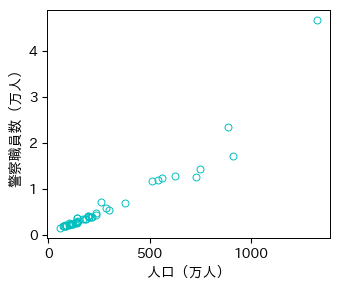

In [17]:
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['警察職員数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel('人口（万人）')
ax.set_ylabel('警察職員数（万人）')
# fig.savefig('figure/pop_police.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [18]:
# 相関係数
Crime.corr()['人口']['警察職員数']

0.9478341323186452

#### 実習：人口の影響を取り除く方法
- 刑法犯認知件数と警察職員数の散布図について，人口が100万人未満，100万人以上200万人未満，200万人以上500万人未満で層別し，結果を考察せよ．
- 人口1000人あたりの警察職員数と刑法犯罪認知件数に関する散布図を描いてその相関係数を求め，結果を考察せよ．
- 人口の影響を除いた警察職員数と刑法犯認知件数の偏相関係数を求め，結果を考察せよ．

In [25]:
cnd1 = (Crime['人口'] <  1000000)
cnd2 = (Crime['人口'] >= 1000000) & (Crime['人口'] < 2000000)
cnd3 = (Crime['人口'] >= 2000000) & (Crime['人口'] < 5000000)

Text(0, 0.5, '刑法犯認知件数（万件）')

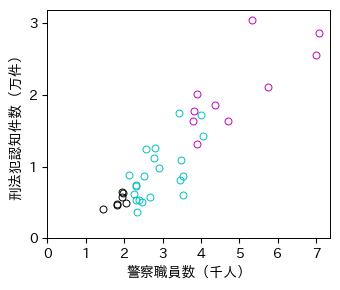

In [26]:
# 層別散布図
fig, ax = plt.subplots()
ax.plot(Crime.loc[cnd1, '警察職員数']/1000, Crime.loc[cnd1, '刑法犯認知件数']/10000, 'ko', mfc='None')
ax.plot(Crime.loc[cnd2, '警察職員数']/1000, Crime.loc[cnd2, '刑法犯認知件数']/10000, 'co', mfc='None')
ax.plot(Crime.loc[cnd3, '警察職員数']/1000, Crime.loc[cnd3, '刑法犯認知件数']/10000, 'mo', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7]); ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('警察職員数（千人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/police_crime2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

Text(0, 0.5, '刑法犯認知件数（人口1000人あたり）')

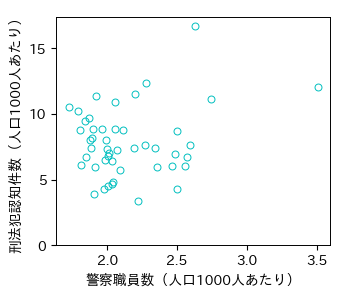

In [24]:
# 人口1000人あたりの散布図
fig, ax = plt.subplots()
ax.plot(1000*Crime['警察職員数']/Crime['人口'], 1000*Crime['刑法犯認知件数']/Crime['人口'], 'co', mfc='None')
ax.set_xticks([2, 2.5, 3, 3.5]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数（人口1000人あたり）')
ax.set_ylabel('刑法犯認知件数（人口1000人あたり）')
# fig.savefig('figure/police_crime3.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [23]:
# 偏相関係数
r = Crime.corr()
cov = r['警察職員数']['刑法犯認知件数'] - r['警察職員数']['人口']*r['刑法犯認知件数']['人口']
denom = np.sqrt((1-r['警察職員数']['人口']**2)*(1-r['刑法犯認知件数']['人口']**2))
cov / denom

0.37891466581890526

### STEP 5: Conclusion

#### 実習
- 解析の結果から，警察職員数と刑法犯認知件数の間に因果関係があるかどうか考察せよ．